<a href="https://colab.research.google.com/github/roshanappa/Deep-Learning-Models./blob/master/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
len(x_train)

50000

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
len(x_test)

10000

In [0]:
y_train=y_train.ravel()

In [0]:
classes_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [9]:
classes_names[y_train[3]]

'Deer'

In [0]:
def view_image(x_train,y_train,index):
  plt.subplot(1,2,1)
  plt.imshow(x_train[index],cmap=plt.get_cmap('binary'),interpolation=None)
  plt.colorbar()
  plt.title('Its a {}'.format(classes_names[y_train[index]]))
  print()

  plt.subplot(1,2,2)
  plt.hist(x_train[index].reshape(3072))
  plt.title('Its a pixel distribution of  {}'.format(classes_names[y_train[index]]))
  plt.tight_layout()
plt.show()


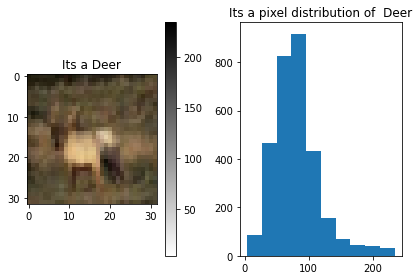

In [11]:
view_image(x_train,y_train,3)

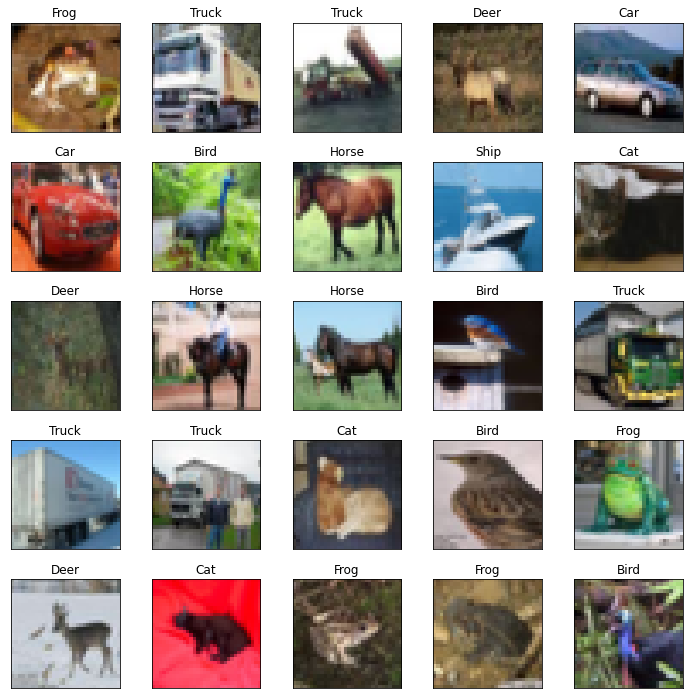

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):

  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap='binary',interpolation=None)
  plt.tight_layout()
  plt.xticks([])
  plt.yticks([])
  plt.title(classes_names[y_train[i]])
plt.show()

##  Standardization and Normalization..

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

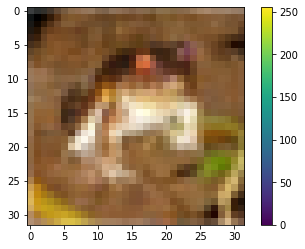

In [15]:
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [0]:
x_train = x_train/255
x_test  = x_test/255

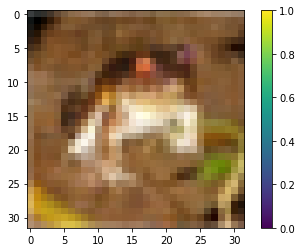

In [17]:
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [18]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [19]:
x_train[0].shape

(32, 32, 3)

## Create A model.

In [0]:
model = Sequential()
model.add(Conv2D(500,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=x_train[0].shape))
model.add(Dropout(0.50))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.30))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid')) #stride = unit momnet of the scan and padding=It tries to reduce the dimensions.

model.add(Flatten())
model.add(Dense(200,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.30))
model.add(Dense(10,activation='softmax',kernel_initializer='he_uniform'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 500)       14000     
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 500)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 500)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       576128    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [23]:
history = model.fit(x_train,y_train,batch_size=20,epochs=15,verbose=1,validation_data=(x_test,y_test))

Epoch 1/15
2500/2500 [==============================] - 54s 22ms/step - loss: 1.7428 - sparse_categorical_accuracy: 0.3684 - val_loss: 1.5294 - val_sparse_categorical_accuracy: 0.4941
Epoch 2/15
2500/2500 [==============================] - 54s 22ms/step - loss: 1.3659 - sparse_categorical_accuracy: 0.5091 - val_loss: 1.3722 - val_sparse_categorical_accuracy: 0.5456
Epoch 3/15
2500/2500 [==============================] - 54s 22ms/step - loss: 1.1726 - sparse_categorical_accuracy: 0.5829 - val_loss: 1.1888 - val_sparse_categorical_accuracy: 0.6260
Epoch 4/15
2500/2500 [==============================] - 54s 22ms/step - loss: 1.0527 - sparse_categorical_accuracy: 0.6307 - val_loss: 1.1500 - val_sparse_categorical_accuracy: 0.6284
Epoch 5/15
2500/2500 [==============================] - 54s 22ms/step - loss: 0.9754 - sparse_categorical_accuracy: 0.6582 - val_loss: 1.0271 - val_sparse_categorical_accuracy: 0.6585
Epoch 6/15
2500/2500 [==============================] - 54s 22ms/step - loss: 0.

## Accuracy,Confusion Matrix and Learning curve.

In [24]:
history.history

{'loss': [1.7427929639816284,
  1.3658759593963623,
  1.172647476196289,
  1.0527476072311401,
  0.9754008054733276,
  0.9154860377311707,
  0.8698520660400391,
  0.8357146382331848,
  0.7939193248748779,
  0.7642198204994202,
  0.7410963773727417,
  0.7133903503417969,
  0.6921987533569336,
  0.6718789339065552,
  0.6454260349273682],
 'sparse_categorical_accuracy': [0.36844000220298767,
  0.509119987487793,
  0.5828800201416016,
  0.6307200193405151,
  0.6581799983978271,
  0.6794000267982483,
  0.697700023651123,
  0.7068799734115601,
  0.7217199802398682,
  0.7350999712944031,
  0.740880012512207,
  0.7512999773025513,
  0.7565000057220459,
  0.7654200196266174,
  0.773580014705658],
 'val_loss': [1.5294142961502075,
  1.3722319602966309,
  1.1887925863265991,
  1.150011420249939,
  1.0270689725875854,
  0.9959389567375183,
  0.9591088891029358,
  0.9588562846183777,
  0.8982988595962524,
  0.9028580784797668,
  0.8981199860572815,
  0.8496369123458862,
  0.88508141040802,
  0.8879

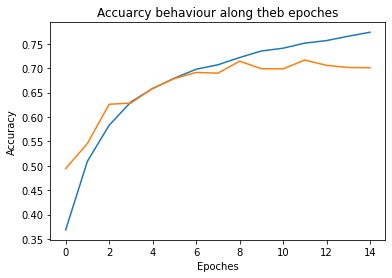

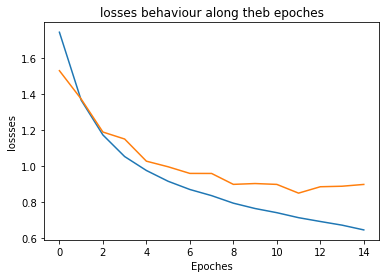

In [25]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.title('Accuarcy behaviour along theb epoches')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoches')
plt.ylabel('lossses')
plt.title('losses behaviour along theb epoches')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
y_pred = model.predict_classes(x_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 1, 8, ..., 2, 4, 7])

In [28]:
accurately_predicted = np.nonzero(y_pred == y_test)[0]
len(accurately_predicted)

10000000

In [29]:
Not_accuarctely_predicted = np.nonzero(y_pred != y_test)[0]
len(Not_accuarctely_predicted)

90000000

In [30]:
y_preductions = model.predict(x_test)
y_preductions

array([[1.2491535e-01, 8.3211558e-03, 4.3090712e-02, ..., 8.1777293e-03,
        4.8709340e-02, 2.2368683e-02],
       [1.8553132e-02, 5.3097630e-01, 1.5818368e-05, ..., 2.6293764e-08,
        4.2627889e-01, 2.4167007e-02],
       [2.8907496e-01, 3.6822934e-02, 3.7031546e-02, ..., 4.0415302e-03,
        4.3981642e-01, 9.8438226e-02],
       ...,
       [2.6012279e-04, 1.7196566e-05, 4.8212230e-01, ..., 6.5474242e-02,
        2.2281415e-04, 3.9305323e-04],
       [3.0865347e-02, 5.5852887e-04, 5.1760901e-02, ..., 7.0555564e-03,
        6.7838328e-03, 7.0037786e-04],
       [2.1137626e-07, 6.9917907e-09, 1.2990946e-05, ..., 9.7578943e-01,
        7.6955482e-09, 3.8914544e-07]], dtype=float32)

In [31]:
predicted_entity = np.argmax(y_preductions[10])
predicted_entity

0

In [32]:
name_of_the_entity = classes_names[predicted_entity]
name_of_the_entity

'Plane'

In [0]:
def predicted_entity(x_test,index):
  y_preductions = model.predict(x_test)
  predicted_entity = np.argmax(y_preductions[index])
  predicted_entity = np.argmax(y_preductions[index])
  name_of_the_entity = classes_names[predicted_entity]
  return name_of_the_entity

In [34]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[813,   7,  32,  22,  21,   3,  15,   6,  44,  37],
       [ 24, 799,   6,  11,   5,   1,  17,   3,  35,  99],
       [101,   4, 582,  57, 116,  39,  76,  13,   8,   4],
       [ 50,   7,  61, 494, 127, 102, 112,  17,   9,  21],
       [ 24,   0,  78,  62, 721,  20,  63,  22,   7,   3],
       [ 31,   4,  62, 240,  80, 482,  60,  30,   8,   3],
       [ 10,   1,  36,  45,  55,   3, 838,   3,   7,   2],
       [ 23,   1,  43,  52, 139,  50,   9, 671,   0,  12],
       [100,  17,  19,  21,  13,   2,   7,   5, 779,  37],
       [ 39,  53,   7,  19,  14,   6,   8,   7,  17, 830]])

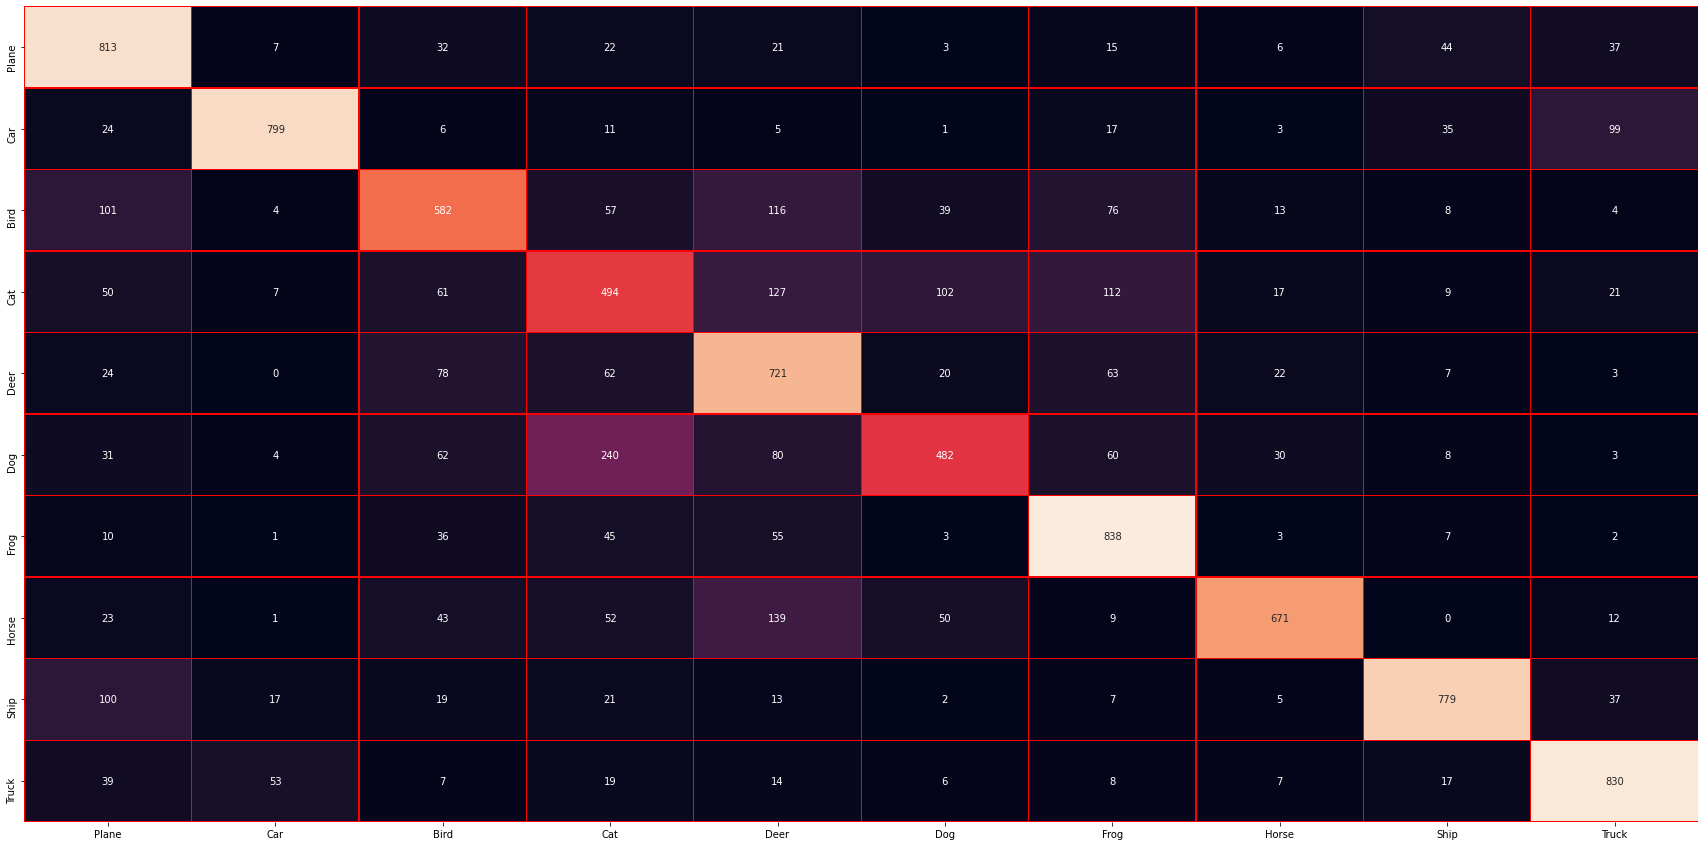

In [35]:
plt.figure(figsize=(30,15))
sns.heatmap(mat,annot=True,fmt='d',linecolor='red',linewidths=0.4,xticklabels=classes_names,yticklabels=classes_names,cbar=False)
plt.show()

In [36]:
print('Accuarcy :-',accuracy_score(y_test,y_pred))

Accuarcy :- 0.7009


## **VGG19**

In [0]:
model = Sequential()
model.add(Conv2D(input_shape=x_train[0].shape,filters=256,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer='he_uniform'))
model.add(Dropout(0.50))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Dropout(0.50))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Dropout(0.50))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Flatten())

model.add(Dense(units=500,activation="relu"))
model.add(Dropout(0.50))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.50))
model.add(Dense(units=10, activation="softmax"))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       295040    
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)         

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [40]:
history=model.fit(x_train,y_train,batch_size=30,epochs=20,verbose=2,validation_data=(x_test,y_test))

Epoch 1/20
1667/1667 - 32s - loss: 1.7598 - sparse_categorical_accuracy: 0.3517 - val_loss: 1.8112 - val_sparse_categorical_accuracy: 0.3729
Epoch 2/20
1667/1667 - 32s - loss: 1.4758 - sparse_categorical_accuracy: 0.4638 - val_loss: 1.6823 - val_sparse_categorical_accuracy: 0.4119
Epoch 3/20
1667/1667 - 32s - loss: 1.3655 - sparse_categorical_accuracy: 0.5119 - val_loss: 1.6237 - val_sparse_categorical_accuracy: 0.4184
Epoch 4/20
1667/1667 - 32s - loss: 1.3009 - sparse_categorical_accuracy: 0.5353 - val_loss: 1.5947 - val_sparse_categorical_accuracy: 0.4081
Epoch 5/20
1667/1667 - 32s - loss: 1.2719 - sparse_categorical_accuracy: 0.5507 - val_loss: 1.5746 - val_sparse_categorical_accuracy: 0.4662
Epoch 6/20
1667/1667 - 32s - loss: 1.2400 - sparse_categorical_accuracy: 0.5623 - val_loss: 1.6955 - val_sparse_categorical_accuracy: 0.3963
Epoch 7/20
1667/1667 - 32s - loss: 1.2209 - sparse_categorical_accuracy: 0.5704 - val_loss: 1.5417 - val_sparse_categorical_accuracy: 0.4879
Epoch 8/20
16

In [41]:
history.history

{'loss': [1.7598369121551514,
  1.475826621055603,
  1.3654946088790894,
  1.300860047340393,
  1.27187979221344,
  1.2400449514389038,
  1.2209354639053345,
  1.20536208152771,
  1.1897774934768677,
  1.1835750341415405,
  1.1689175367355347,
  1.1727653741836548,
  1.1506210565567017,
  1.1414114236831665,
  1.1498013734817505,
  1.1441125869750977,
  1.1464662551879883,
  1.1312596797943115,
  1.1296594142913818,
  1.130838394165039],
 'sparse_categorical_accuracy': [0.3517400026321411,
  0.4638200104236603,
  0.5119400024414062,
  0.5353400111198425,
  0.5506600141525269,
  0.562279999256134,
  0.570360004901886,
  0.5789200067520142,
  0.5826799869537354,
  0.586679995059967,
  0.5901399850845337,
  0.5896199941635132,
  0.5970600247383118,
  0.6009399890899658,
  0.6010400056838989,
  0.6049200296401978,
  0.6010199785232544,
  0.6108199954032898,
  0.6057800054550171,
  0.6092399954795837],
 'val_loss': [1.8112430572509766,
  1.6822890043258667,
  1.623725414276123,
  1.59470331

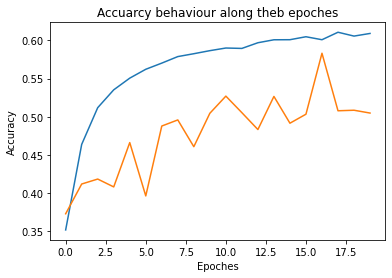

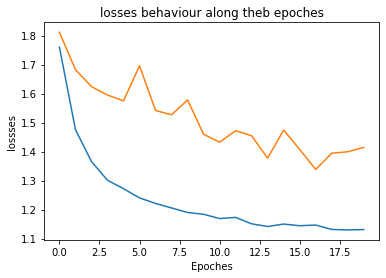

In [42]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.title('Accuarcy behaviour along theb epoches')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoches')
plt.ylabel('lossses')
plt.title('losses behaviour along theb epoches')
plt.show()

## Thank You !!!